In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

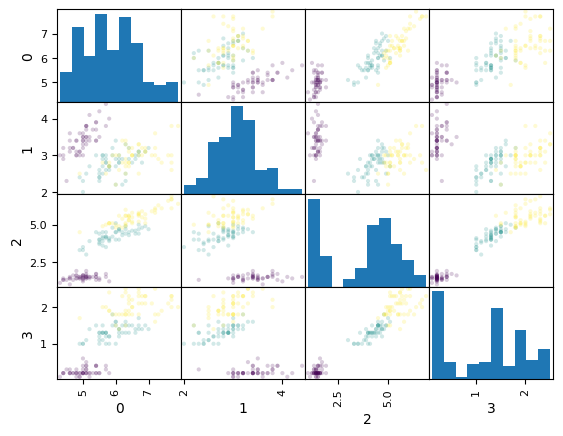

In [2]:
pd.plotting.scatter_matrix(pd.DataFrame(data=iris.data), c=iris.target, alpha=0.2)

In [3]:
import math

indices = np.arange(len(iris.data))
np.random.shuffle(indices)
train_cutoff = math.floor(len(indices) * 0.7)
trainX = iris.data[indices][0:train_cutoff]
trainY = iris.target[indices][0:train_cutoff]
testX = iris.data[indices][train_cutoff:]
testY = iris.target[indices][train_cutoff:]

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

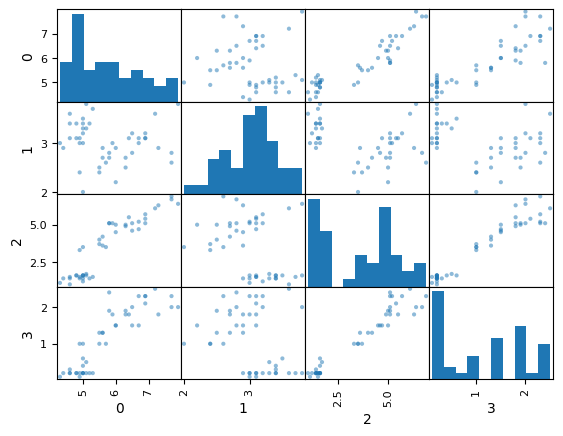

In [4]:
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), alpha=0.5)

In [5]:
# kNN algorithm
k = 5
# 1. calculate distances between test examples and training examples
distances = np.zeros((len(trainX), len(testX)))
for i in range(len(trainX)):
    for j in range(len(testX)):
        distances[i, j] = np.sqrt(np.sum(np.square(trainX[i] - testX[j])))

# 2. for each data point, select k closest training instances
predY = np.zeros_like(testY)
for j in range(len(predY)):
    indices = np.argsort(distances[:,j])[0:k]
    neighborYs = trainY[indices]
    # get most common vote
    counts = np.bincount(neighborYs)
    predY[j] = np.argmax(counts)

In [6]:
isCorrect = (predY == testY)
accuracy = sum(isCorrect) / len(testY)
print(accuracy)

0.9777777777777777


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

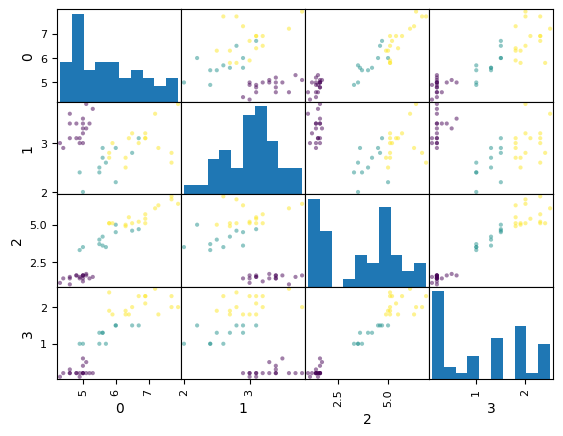

In [8]:
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), c=predY, alpha=0.5)

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

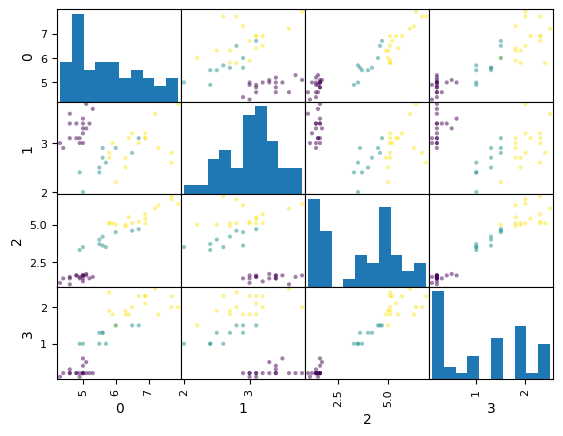

In [9]:
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), c=testY, alpha=0.5)